# TODO: Title

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [3]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install smdebug


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [10]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import sagemaker
import boto3

import os

In [11]:
# Run this cell to import or install the Data Wrangler widget to show automatic visualization and generate code to fix data quality issues
try:
    import sagemaker_datawrangler
except ImportError:
    !pip install --upgrade sagemaker-datawrangler
    import sagemaker_datawrangler

# Display Pandas DataFrame to view the widget: df, display(df), df.sample()... 

## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [8]:
# Command to download and unzip data
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!unzip dogImages.zip > /dev/null

--2023-05-06 16:58:22--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.194.96
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.194.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip.1’

dogImages.zip.1     100%[===================>]   1.05G  49.0MB/s    in 23s     

2023-05-06 16:58:55 (46.4 MB/s) - ‘dogImages.zip.1’ saved [1132023110/1132023110]

unzip:  cannot find or open dogImages., dogImages..zip or dogImages..ZIP.


In [12]:
bucket= 'udacityproject3'

print("Default Bucket: {}".format(bucket))

region = sagemaker.Session().boto_region_name
print("AWS Region: {}".format(region))

role = sagemaker.get_execution_role()
print("RoleArn: {}".format(role))

Default Bucket: udacityproject3
AWS Region: us-east-1
RoleArn: arn:aws:iam::237845067016:role/service-role/AmazonSageMaker-ExecutionRole-20230402T181968


In [14]:
os.getcwd()

'/root/CD0387-deep-learning-topics-within-computer-vision-nlp-project-starter'

In [15]:
#TODO: Fetch and upload the data to AWS S3

os.environ["DEFAULT_S3_BUCKET"] = bucket
!aws s3 sync ./dogImages/train s3://${DEFAULT_S3_BUCKET}/train/; 
!aws s3 sync ./dogImages/test s3://${DEFAULT_S3_BUCKET}/test/;
!aws s3 sync ./dogImages/valid s3://${DEFAULT_S3_BUCKET}/valid/;

upload: dogImages/train/001.Affenpinscher/Affenpinscher_00002.jpg to s3://udacityproject3/train/001.Affenpinscher/Affenpinscher_00002.jpg
upload: dogImages/train/001.Affenpinscher/Affenpinscher_00004.jpg to s3://udacityproject3/train/001.Affenpinscher/Affenpinscher_00004.jpg
upload: dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg to s3://udacityproject3/train/001.Affenpinscher/Affenpinscher_00001.jpg
upload: dogImages/train/001.Affenpinscher/Affenpinscher_00010.jpg to s3://udacityproject3/train/001.Affenpinscher/Affenpinscher_00010.jpg
upload: dogImages/train/001.Affenpinscher/Affenpinscher_00007.jpg to s3://udacityproject3/train/001.Affenpinscher/Affenpinscher_00007.jpg
upload: dogImages/train/001.Affenpinscher/Affenpinscher_00008.jpg to s3://udacityproject3/train/001.Affenpinscher/Affenpinscher_00008.jpg
upload: dogImages/train/001.Affenpinscher/Affenpinscher_00011.jpg to s3://udacityproject3/train/001.Affenpinscher/Affenpinscher_00011.jpg
upload: dogImages/train/001.Affenp

## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [13]:
from sagemaker.tuner import (IntegerParameter, 
                            CategoricalParameter, 
                            ContinuousParameter,
                            HyperparameterTuner)
from sagemaker.pytorch import PyTorch, PyTorchModel

from sagemaker.session import Session

In [7]:
#TODO: Declare your HP ranges, metrics etc.

hyperparameter_ranges = {
    'lr': ContinuousParameter(0.001, 0.1), # learning rate is the parameter that controls how quickly the model is adapted to the problem
    'batch_size': CategoricalParameter([32,64,128]),  # batch size is the number of training examples utilized in one iteration
    'epochs': IntegerParameter(2, 3) # number of epochs is the number of complete passes through the training dataset
}

objective_metric_name = "average test loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "average test loss", "Regex": "Test set: Average loss: ([0-9\\.]+)"}]

In [14]:
#TODO: Create estimators for your HPs

estimator = PyTorch(entry_point = 'hpo.py',
                                    base_job_name = 'breedClassification',
                                    role = role,
                                    instance_count = 1,
                                    instance_type = 'ml.m5.2xlarge', 
                                    py_version = 'py36',
                                    framework_version = '1.8')

tuner = HyperparameterTuner(estimator,
                            objective_metric_name,
                            hyperparameter_ranges,
                            metric_definitions,
                            max_jobs = 1,
                            max_parallel_jobs = 1,
                            objective_type = objective_type)

In [72]:
print("hello")

hello


In [17]:
estimator.fit({'train':'s3://udacityproject3/dogImages'}, wait=True) 

2023-05-07 12:12:03 Starting - Starting the training job...
2023-05-07 12:12:18 Starting - Preparing the instances for training...
2023-05-07 12:13:10 Downloading - Downloading input data......
2023-05-07 12:14:10 Training - Training image download completed. Training in progress...bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2023-05-07 12:14:25,598 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2023-05-07 12:14:25,601 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2023-05-07 12:14:25,609 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2023-05-07 12:14:25,611 sagemaker_pytorch_container.training INFO     Invoking user training script.
2023-05-07 12:14:25,792 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2023-05-07 12:14:25,806 sagemaker-training-toolkit INFO     No

In [18]:
# TODO: Fit your HP Tuner
# TODO: Remember to include your data channels
tuner.fit({'train':'s3://udacityproject3/dogImages'}, wait=True) 

.........

KeyboardInterrupt: 

# TODO: Get the best estimators and the best HPs

best_estimator = tuner.best_estimator()

#Get the hyperparameters of the best trained model
best_estimator.hyperparameters()

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [19]:
# TODO: Set up debugging and profiling rules and hooks
from sagemaker.debugger import Rule, rule_configs, ProfilerRule, DebuggerHookConfig, CollectionConfig, ProfilerConfig, FrameworkProfile

rules = [
    Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.poor_weight_initialization()),
    ProfilerRule.sagemaker(rule_configs.ProfilerReport()),
]

profiler_config = ProfilerConfig(system_monitor_interval_millis=500, 
                                                       framework_profile_params = FrameworkProfile(num_steps=10))

collection_config = [CollectionConfig(name="CrossEntropyLoss_output_0", 
                                    parameters={"include_regex": "CrossEntropyLoss_output_0",
                                                            "train.save_interval": "10",
                                                            "eval.save_interval": "1"})]

debugger_config = DebuggerHookConfig(collection_configs = collection_config)

In [ ]:
best_estimator = tuner.best_estimator()

best_estimator.hyperparameters()

In [26]:
best_hyperparameters = {'batch_size': 128,'epochs': 3, 'lr': 0.002515879183181917}

In [27]:
print(best_hyperparameters)

estimator = PyTorch(entry_point = 'train_model.py',
                                    role = role,
                                    instance_count=1,
                                    instance_type = 'ml.m5.2xlarge',
                                    py_version = 'py36',
                                    framework_version = '1.6',
                                    hyperparameters = best_hyperparameters,
                                    profiler_config = profiler_config, 
                                    debugger_hook_config = debugger_config, 
                                    rules = rules ) 

{'batch_size': 128, 'epochs': 3, 'lr': 0.002515879183181917}


In [ ]:
# TODO: Plot a debugging output.
estimator.fit({'train':'s3://udacityproject3/dogImages'}, wait=True)

2023-05-07 13:05:15 Starting - Starting the training job...
2023-05-07 13:05:52 Starting - Preparing the instances for trainingVanishingGradient: InProgress
PoorWeightInitialization: InProgress
ProfilerReport: InProgress
.........
2023-05-07 13:07:20 Downloading - Downloading input data......
2023-05-07 13:08:20 Training - Training image download completed. Training in progress.bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2023-05-07 13:08:13,039 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2023-05-07 13:08:13,041 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2023-05-07 13:08:13,052 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2023-05-07 13:08:13,054 sagemaker_pytorch_container.training INFO     Invoking user training script.
2023-05-07 13:08:13,235 sagemaker-training-toolkit INFO     No GPUs det

In [25]:
# TODO: Plot a debugging output.
estimator.fit({'train':'s3://udacityproject3/dogImages'}, wait=True)

2023-05-07 12:53:22 Starting - Starting the training job...
2023-05-07 12:53:59 Starting - Preparing the instances for trainingVanishingGradient: InProgress
PoorWeightInitialization: InProgress
ProfilerReport: InProgress
...
2023-05-07 12:54:26 Downloading - Downloading input data......
2023-05-07 12:55:26 Training - Training image download completed. Training in progress..bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2023-05-07 12:55:27,316 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2023-05-07 12:55:27,318 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2023-05-07 12:55:27,329 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2023-05-07 12:55:27,331 sagemaker_pytorch_container.training INFO     Invoking user training script.
2023-05-07 12:55:27,497 sagemaker-training-toolkit INFO     No GPUs detected

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

## Model Deploying

In [44]:
# TODO: Deploy your model to an endpoint
# TODO: Add your deployment configuration like instance type and number of instances
predictor = estimator.deploy(initial_instance_count=1, instance_type = "ml.m5.2xlarge") 

----!

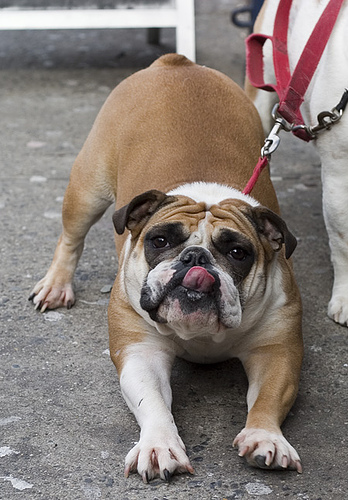

ModelError: An error occurred (ModelError) when calling the InvokeEndpoint operation: Received server error (0) from primary with message "Your invocation timed out while waiting for a response from container primary. Review the latency metrics for each container in Amazon CloudWatch, resolve the issue, and try again.". See https://us-east-1.console.aws.amazon.com/cloudwatch/home?region=us-east-1#logEventViewer:group=/aws/sagemaker/Endpoints/pytorch-training-2023-05-07-16-03-08-842 in account 237845067016 for more information.

In [50]:
from PIL import Image
import io
import os
import numpy as np

test_dir = "./dogImages/test/040.Bulldog/"
test_image = "Bulldog_02817.jpg"

test_image = test_images[index]
test_file_path = os.path.join(test_dir, test_image) 

with open(test_file_path , "rb") as f:
    payload = f.read()
    display(Image.open(io.BytesIO(payload)))
    response = predictor.predict(payload, initial_args={"ContentType": "image/jpeg"}) 
    predicted_dog_breed = np.argmax(response, 1) + 1
    print(f"Inference on class: {predicted_dog_breed} \n\n")

In [42]:
predictor.delete_endpoint()